In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
Y = pd.Series(iris.target)

In [3]:
# Display the first few rows of the dataset
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


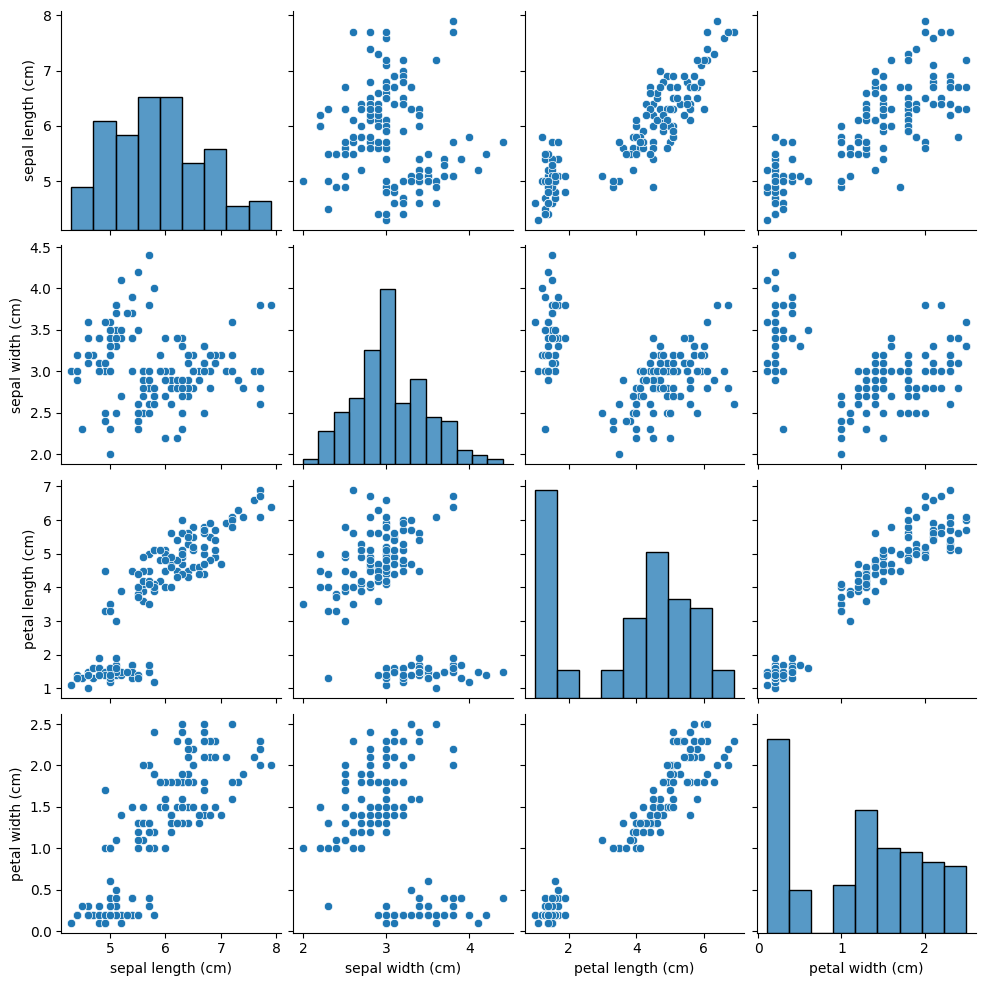

In [4]:
# Visualize the dataset using pairplot
sns.pairplot(X)
plt.show()

In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Apply PCA for dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

/Users/prajwal/Developer/Prep/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [8]:
# Predict the cluster for each data point
clusters = kmeans.predict(X_pca)

In [9]:
# Add the cluster as a new column to the dataset
X['Cluster'] = clusters

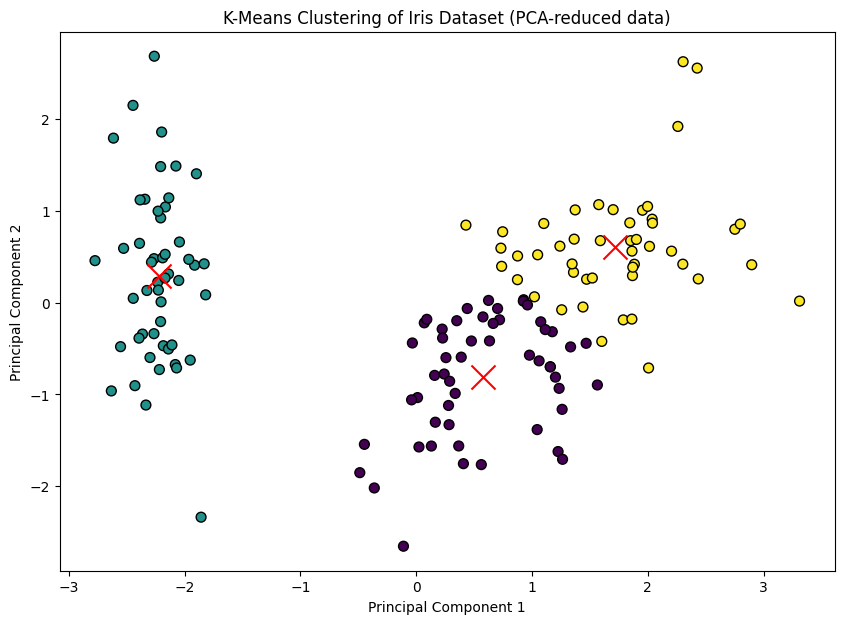

In [10]:
# Visualize the clustering results using a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('K-Means Clustering of Iris Dataset (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [11]:
# Evaluate the clustering results using silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5091683341538228


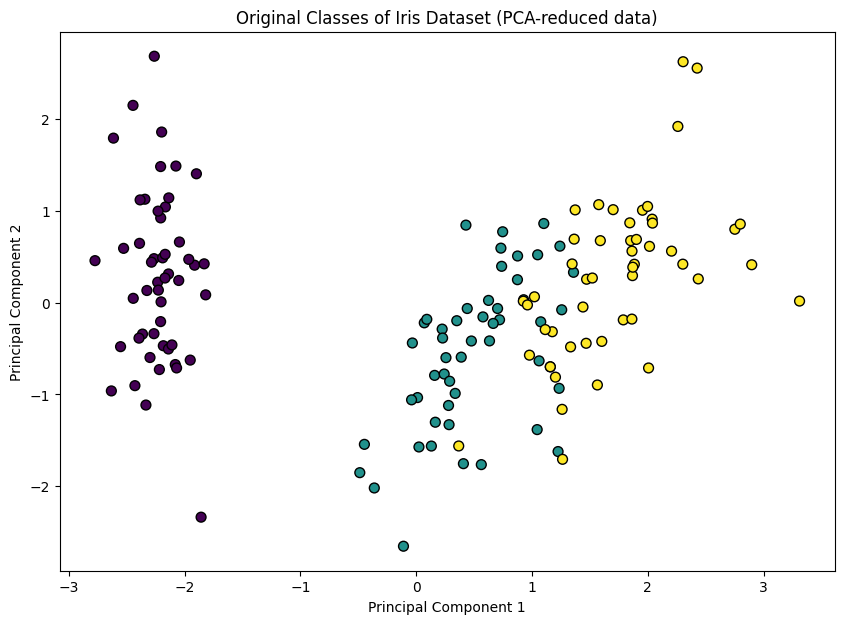

In [12]:
# Visualize the original classes
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Original Classes of Iris Dataset (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()